# Semantic Link

- More information: https://learn.microsoft.com/en-us/fabric/data-science/semantic-link-overview

## FabricDataFrame
- Supports all pandas operations.
- Subclasses the pandas DataFrame and adds metadata, such as semantic information and lineage.
- Exposes semantic functions and the add-measure method that lets you use Power BI measures in data science work.
- Can run type(df) to see what object type it is - pandas - i.e. pandas.core.frame.DataFrame

## Install  Semantic Link
## Already installed in Python Notebook and Spark
## Will update to latest version

In [1]:
%pip install -U semantic-link

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.4/338.4 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 62.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 72.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 105.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: semantic-link-sempy
    Found existing installation: semantic-link-sempy 0.11.0
    Uninstalling semantic-link-sempy-0.11.0:
      Successfully uni

In [2]:
%pip list | grep -i semantic-link-sempy

semantic-link-sempy                0.11.0
Note: you may need to restart the kernel to use updated packages.


Scale Up in Pure Python Notebook
### Options are 2,4,8,16 (32 and 64)
#### **Note: Increases start-up time and resources used**
#### **Default is trying to get you in and working quickly**
https://learn.microsoft.com/en-us/fabric/data-engineering/using-python-experience-on-notebook#session-configuration-magic-command

In [1]:
%%configure - f
{
    "vCores": 4
}


In [1]:
import sempy.fabric as fabric

from sempy.relationships import plot_relationship_metadata
from sempy.relationships import find_relationships
from sempy.fabric import list_relationship_violations

### List Semantic Models (datasets)

In [2]:
df = fabric.list_datasets()
display(df)

In [3]:
modeltables = fabric.list_tables(dataset='Hyrule10K')
display(modeltables)

In [4]:
hyruleSemanticModel = "Hyrule10K"
relationships = fabric.list_relationships(hyruleSemanticModel)
relationships

,Multiplicity,From Table,From Column,To Table,To Column,Active,Cross Filtering Behavior,Security Filtering Behavior,Join On Date Behavior,Rely On Referential Integrity,State,Modified Time,Relationship Name
0,m:1,Sales,ProductKey,Product,ProductKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2025-03-05 04:49:47,a8b50698-7055-48e7-8916-a23af06d860e
1,m:1,Sales,CustomerKey,Customer,CustomerKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2025-03-05 04:49:47,ac5d83e9-674f-414c-a76b-be917eba1763
2,m:1,Sales,StoreKey,Store,StoreKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2025-03-05 04:49:47,9d669e2e-8c9e-4c12-b20e-f93d76a69879
3,m:1,Sales,Order Date,Date,Date,True,OneDirection,OneDirection,DateAndTime,False,Ready,2025-03-05 04:49:47,7a4484ff-5842-46e9-8589-8e6cf9f5b714


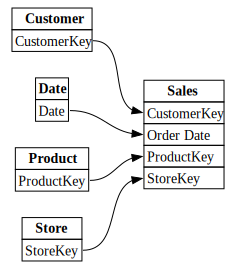

In [6]:
plot_relationship_metadata(relationships)

In [7]:
hyruledate_semanticmodel = "Hyrule10K_WithAutoDate"
relationships_date = fabric.list_relationships(hyruledate_semanticmodel)
relationships_date

,Multiplicity,From Table,From Column,To Table,To Column,Active,Cross Filtering Behavior,Security Filtering Behavior,Join On Date Behavior,Rely On Referential Integrity,State,Modified Time,Relationship Name
0,m:1,Sales,ProductKey,Product,ProductKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2025-03-05 04:49:47,a8b50698-7055-48e7-8916-a23af06d860e
1,m:1,Sales,CustomerKey,Customer,CustomerKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2025-03-05 04:49:47,ac5d83e9-674f-414c-a76b-be917eba1763
2,m:1,Sales,StoreKey,Store,StoreKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2025-03-05 04:49:47,9d669e2e-8c9e-4c12-b20e-f93d76a69879
3,m:1,Sales,Order Date,Date,Date,True,OneDirection,OneDirection,DateAndTime,False,Ready,2025-03-05 04:49:47,7a4484ff-5842-46e9-8589-8e6cf9f5b714
4,m:1,Sales,Delivery Date,LocalDateTable_1a151f76-9243-495e-8cca-934dd16...,Date,True,OneDirection,OneDirection,DatePartOnly,False,Ready,2025-10-13 13:28:42,92faece0-5f1a-4a51-8792-12c6a4ad68be
5,m:1,Store,Open Date,LocalDateTable_b4b67843-943d-4c6b-8ce4-69d8e3d...,Date,True,OneDirection,OneDirection,DatePartOnly,False,Ready,2025-10-13 13:28:42,a9ad5315-665a-49be-9a33-86ffd9fbd09e
6,m:1,Store,Close Date,LocalDateTable_91db0935-ef50-4984-95fa-39a3fd6...,Date,True,OneDirection,OneDirection,DatePartOnly,False,Ready,2025-10-13 13:28:42,460f6d5d-ffbb-4340-8835-fe1761ff4158
7,m:1,Date,Date,LocalDateTable_b56160cf-47a9-4629-a90b-c38e46b...,Date,True,OneDirection,OneDirection,DatePartOnly,False,Ready,2025-10-13 13:28:42,e3bdc768-687f-4768-a8ba-d17a56d0512a
8,m:1,Customer,Birthday,LocalDateTable_6ba37e3b-3ddd-4942-bdf8-35e48ae...,Date,True,OneDirection,OneDirection,DatePartOnly,False,Ready,2025-10-13 13:28:42,565df8ee-a814-48f4-9147-96d5df94619c


## See the invisible (hidden)

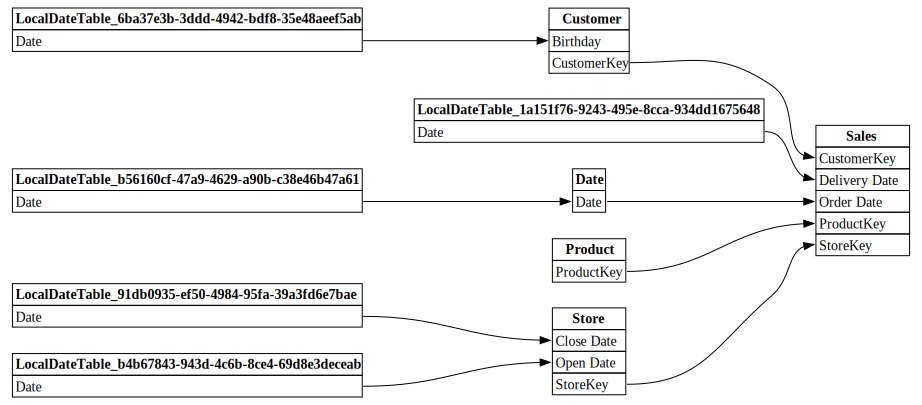

In [8]:
hyruledate_semanticmodel = "Hyrule10K_WithAutoDate"
relationships_date = fabric.list_relationships(hyruledate_semanticmodel)
plot_relationship_metadata(relationships_date)

### Run DAX code against Semantic Modal

In [9]:
%load_ext sempy

In [11]:
%%dax "Hyrule10K" -w "Nashville2025_SLL"

EVALUATE 
SUMMARIZECOLUMNS(
    'Product'[Brand],
   'Date'[Month Short],
   'Date'[Year],
   "Sales Amount",
    CALCULATE([Sales Amount]))

,Product[Brand],Date[Month Short],Date[Year],[Sales Amount]
0,Contoso,Jan,2018,112550.619
1,Wide World Importers,Jan,2018,138872.331
2,Northwind Traders,Jan,2018,7972.614
3,Adventure Works,Jan,2018,155530.706
4,Southridge Video,Jan,2018,33836.24
...,...,...,...,...
373,Fabrikam,Dec,2019,44689.78
374,Proseware,Dec,2019,49316.57
375,A. Datum,Dec,2019,8590.4
376,The Phone Company,Dec,2019,84677.0


### **If you want to do more with these functions, you need to write all the code**
### **Powershell**
### **What if there was another way**
### **That is where Semantic Link Labs comes in**